In [1]:
import numpy as np
from pathlib import Path
import os
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [50]:

dir1="./seg_train/seg_train/"
dir2="./seg_test/seg_test/"
dir3="./seg_pred/seg_pred/"
labels=os.listdir(dir1)
label_dict1={}
label_dict2={}

for i,j in enumerate(labels):
    label_dict1[i]=j
for i,j in enumerate(labels):
    label_dict2[j]=i
def imgPath(dir):
    a=[i for i in Path(dir).rglob("*.jpg")]
    return a
def loadImg(path):
    x=[]
    label=[]
    
        
    for i in tqdm(range(len(path))):
        path1=".\\"+str(path[i])
        
        img=cv2.imread(path1)
        
        img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        img=cv2.resize(img,(100,100))
        img=img/255
        x.append(img)
        label.append(label_dict2[path1.split("\\")[-2]])
    x=np.array(x).reshape(-1,100,100,1)
    label=to_categorical(label)
    return x,np.array(label)

    



In [33]:
x,label=loadImg(imgPath(dir1))
x_test,label_test=loadImg(imgPath(dir2))

(3000, 6)

In [34]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [35]:
def model1():
    model=Sequential()
    model.add(Conv2D(64,(3,3),input_shape=(100,100,1),activation="relu"))
    model.add(MaxPooling2D((2,2)))
    model.add(Conv2D(128,(3,3),activation="relu"))
    model.add(MaxPooling2D((3,3)))
    model.add(Conv2D(256,(3,3),activation="relu"))
    model.add(MaxPooling2D((3,3)))
    model.add(Dropout(0.5))    
    model.add(Conv2D(512,(3,3),activation="relu")) 
    model.add(Flatten())
    model.add(Dense(512,activation="relu"))
    model.add(Dense(6,activation="softmax"))
    return model
              

In [36]:
model2=model1()

In [37]:
model2.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [40]:
model2.fit(datagen.flow(x,label,batch_size=128,shuffle=True),batch_size=128,epochs=24,verbose=True,shuffle=True,validation_data=(datagen.flow(x_test,label_test,batch_size=128,shuffle=True)))

Epoch 1/24
110/110 [==============================] - 26s 218ms/step - loss: 1.0045 - accuracy: 0.6009 - val_loss: 0.8988 - val_accuracy: 0.6467
Epoch 2/24
110/110 [==============================] - 22s 196ms/step - loss: 0.9099 - accuracy: 0.6414 - val_loss: 0.8495 - val_accuracy: 0.6770
Epoch 3/24
110/110 [==============================] - 22s 197ms/step - loss: 0.8426 - accuracy: 0.6830 - val_loss: 0.7416 - val_accuracy: 0.7153
Epoch 4/24
110/110 [==============================] - 22s 200ms/step - loss: 0.7657 - accuracy: 0.7122 - val_loss: 0.7158 - val_accuracy: 0.7307
Epoch 5/24
110/110 [==============================] - 22s 199ms/step - loss: 0.7180 - accuracy: 0.7288 - val_loss: 0.6869 - val_accuracy: 0.7347
Epoch 6/24
110/110 [==============================] - 22s 204ms/step - loss: 0.6931 - accuracy: 0.7365 - val_loss: 0.6470 - val_accuracy: 0.7570
Epoch 7/24
110/110 [==============================] - 22s 200ms/step - loss: 0.6827 - accuracy: 0.7445 - val_loss: 0.6089 - val_ac

In [42]:
history=model2.history.history

In [43]:
history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

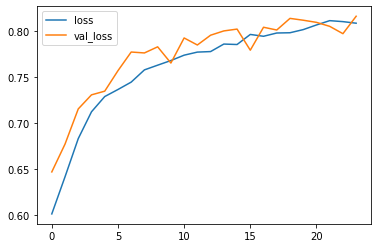

In [49]:
val_loss=history["val_loss"]
val_accuracy=history["val_accuracy"]
loss=history["loss"]
accuracy=history["accuracy"]
plt.plot(accuracy,label="loss")

plt.plot(val_accuracy,label="val_loss")
plt.legend()

In [51]:
def loadImgTest(path):
    x=[]
        
    for i in tqdm(range(len(path))):
        path1=".\\"+str(path[i])
        
        img=cv2.imread(path1)
        
        img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        img=cv2.resize(img,(100,100))
        img=img/255
        x.append(img)
    x=np.array(x).reshape(-1,100,100,1)
    return x
x=loadImgTest(imgPath(dir2))


100%|█████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:04<00:00, 699.76it/s]


In [56]:
pred=model2.predict(x,verbose=1,batch_size=256)

12/12 [==============================] - 4s 259ms/step


Text(0.5, 1.0, 'sea')

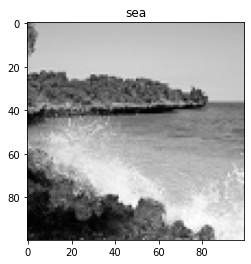

In [71]:

fig,ax=plt.subplots()
plt.imshow(x[2000],cmap="gray")
plt.title(label_dict1[pred[2000].argmax()])